In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file = r'eCO2mix_RTE_Annuel-Definitif_2017.xlsx'
df = pd.read_excel(file)
#df.head()

df["DateTime"] = df["Date"] + ' ' + df["Heures"]
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y/%m/%d %H:%M')

#cols = ['Perimetre', 'Nature', 'DateTime'] + [col for col in df if col != 'DateTime' and col != 'Perimetre' and col != 'Nature']
#df = df[cols]

In [28]:
df['FioulReCalc'] = df['FioulTAC'] + df['FioulCogen'] + df['FioulAutres']
df['GazReCalc'] = df['GazTAC'] + df['GazCogen'] + df['GazCCG'] + df['GazAutres']
df['HydrauliqueReCalc'] = df['HydrauliqueFilEauPlusEcluses'] + df['HydrauliqueLacs'] + df['HydrauliqueSTEPturbinage']
df['BioenergiesReCalc'] = df['BioenergiesDechets'] + df['BioenergiesBiomasse'] + df['BioenergiesBiogaz']
df['EchPhysiquesReCalc'] = df['EchCommAngleterre'] + df['EchCommEspagne'] + df['EchCommItalie'] + df['EchCommSuisse'] + df['EchCommAllemagneBelgique']

df['Fossiles'] = df['Fioul'] + df['Charbon'] + df['Gaz']
df['Renouv'] = df['Eolien'] + df['Solaire'] + df['Hydraulique'] + df['Bioenergies']

df['ProdTot'] = df['Nucleaire'] + df['Fossiles'] + df['Renouv']

df['ConsommationReCalc'] = df['ProdTot'] + df['Pompage'] + df['EchPhysiques']

df['NucleaireFrac'] = df['Nucleaire']/df['ProdTot']
df['RenouvFrac'] = df['Renouv']/df['ProdTot']
df['FossilesFrac'] = df['Fossiles']/df['ProdTot']


In [29]:
df2 = df.set_index('DateTime', inplace=False)
df3 = df2.dropna()
df3.head()

,Perimetre,Nature,Date,Heures,Consommation,PrevisionJ-1,PrevisionJ,Fioul,Charbon,Gaz,...,HydrauliqueReCalc,BioenergiesReCalc,Fossiles,Renouv,ProdTot,NucleaireFrac,RenouvFrac,FossilesFrac,EchPhysiquesReCalc,ConsommationReCalc
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,France,Donnees definitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,6544.0,1090.0,9360.0,7898.0,70786.0,0.756195,0.111576,0.132230,4787.0,76259.0
2017-01-01 00:30:00,France,Donnees definitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,6921.0,1100.0,8733.0,8330.0,70519.0,0.758037,0.118124,0.123839,4787.0,74980.0
2017-01-01 01:00:00,France,Donnees definitives,2017-01-01,01:00,72912.0,73400.0,73400.0,596.0,1291.0,6593.0,...,5568.0,1091.0,8480.0,7010.0,68921.0,0.775250,0.101711,0.123039,4627.0,72913.0
2017-01-01 01:30:00,France,Donnees definitives,2017-01-01,01:30,72682.0,73900.0,73900.0,587.0,1028.0,6595.0,...,5416.0,1099.0,8210.0,6881.0,68520.0,0.779758,0.100423,0.119819,4627.0,72683.0
2017-01-01 02:00:00,France,Donnees definitives,2017-01-01,02:00,72166.0,73300.0,73300.0,599.0,1024.0,6548.0,...,5085.0,1100.0,8171.0,6544.0,68096.0,0.783908,0.096100,0.119992,4723.0,72167.0


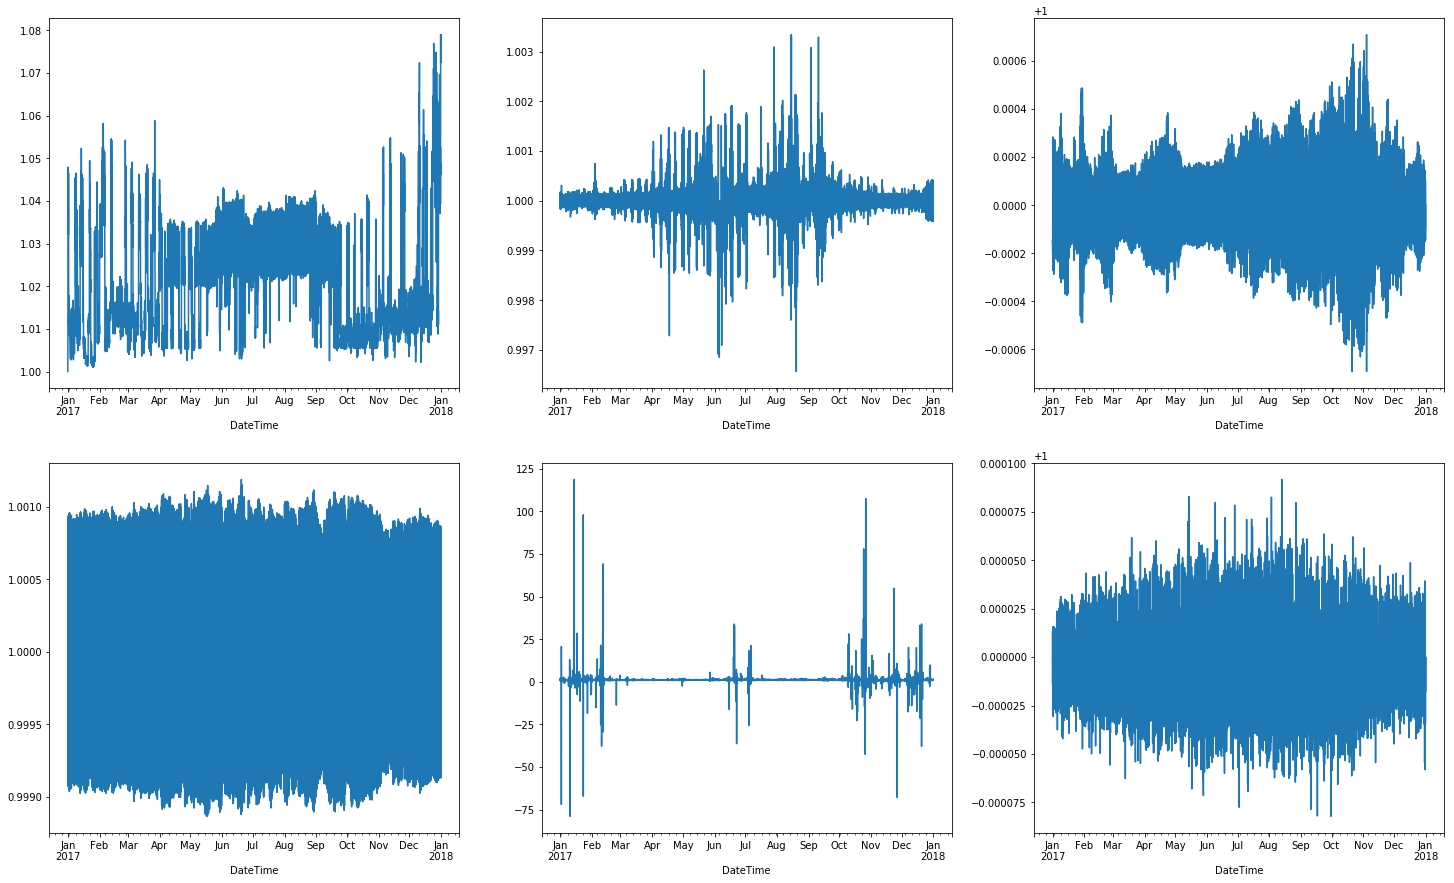

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(25,15))

(df3['Fioul']/df3['FioulReCalc']).plot(ax=axes[0,0])
(df3['Gaz']/df3['GazReCalc']).plot(ax=axes[0,1])
(df3['Hydraulique']/df3['HydrauliqueReCalc']).plot(ax=axes[0,2])
(df3['Bioenergies']/df3['BioenergiesReCalc']).plot(ax=axes[1,0])
(df3['EchPhysiques']/df3['EchPhysiquesReCalc']).plot(ax=axes[1,1])
(df3['Consommation']/df3['ConsommationReCalc']).plot(ax=axes[1,2])

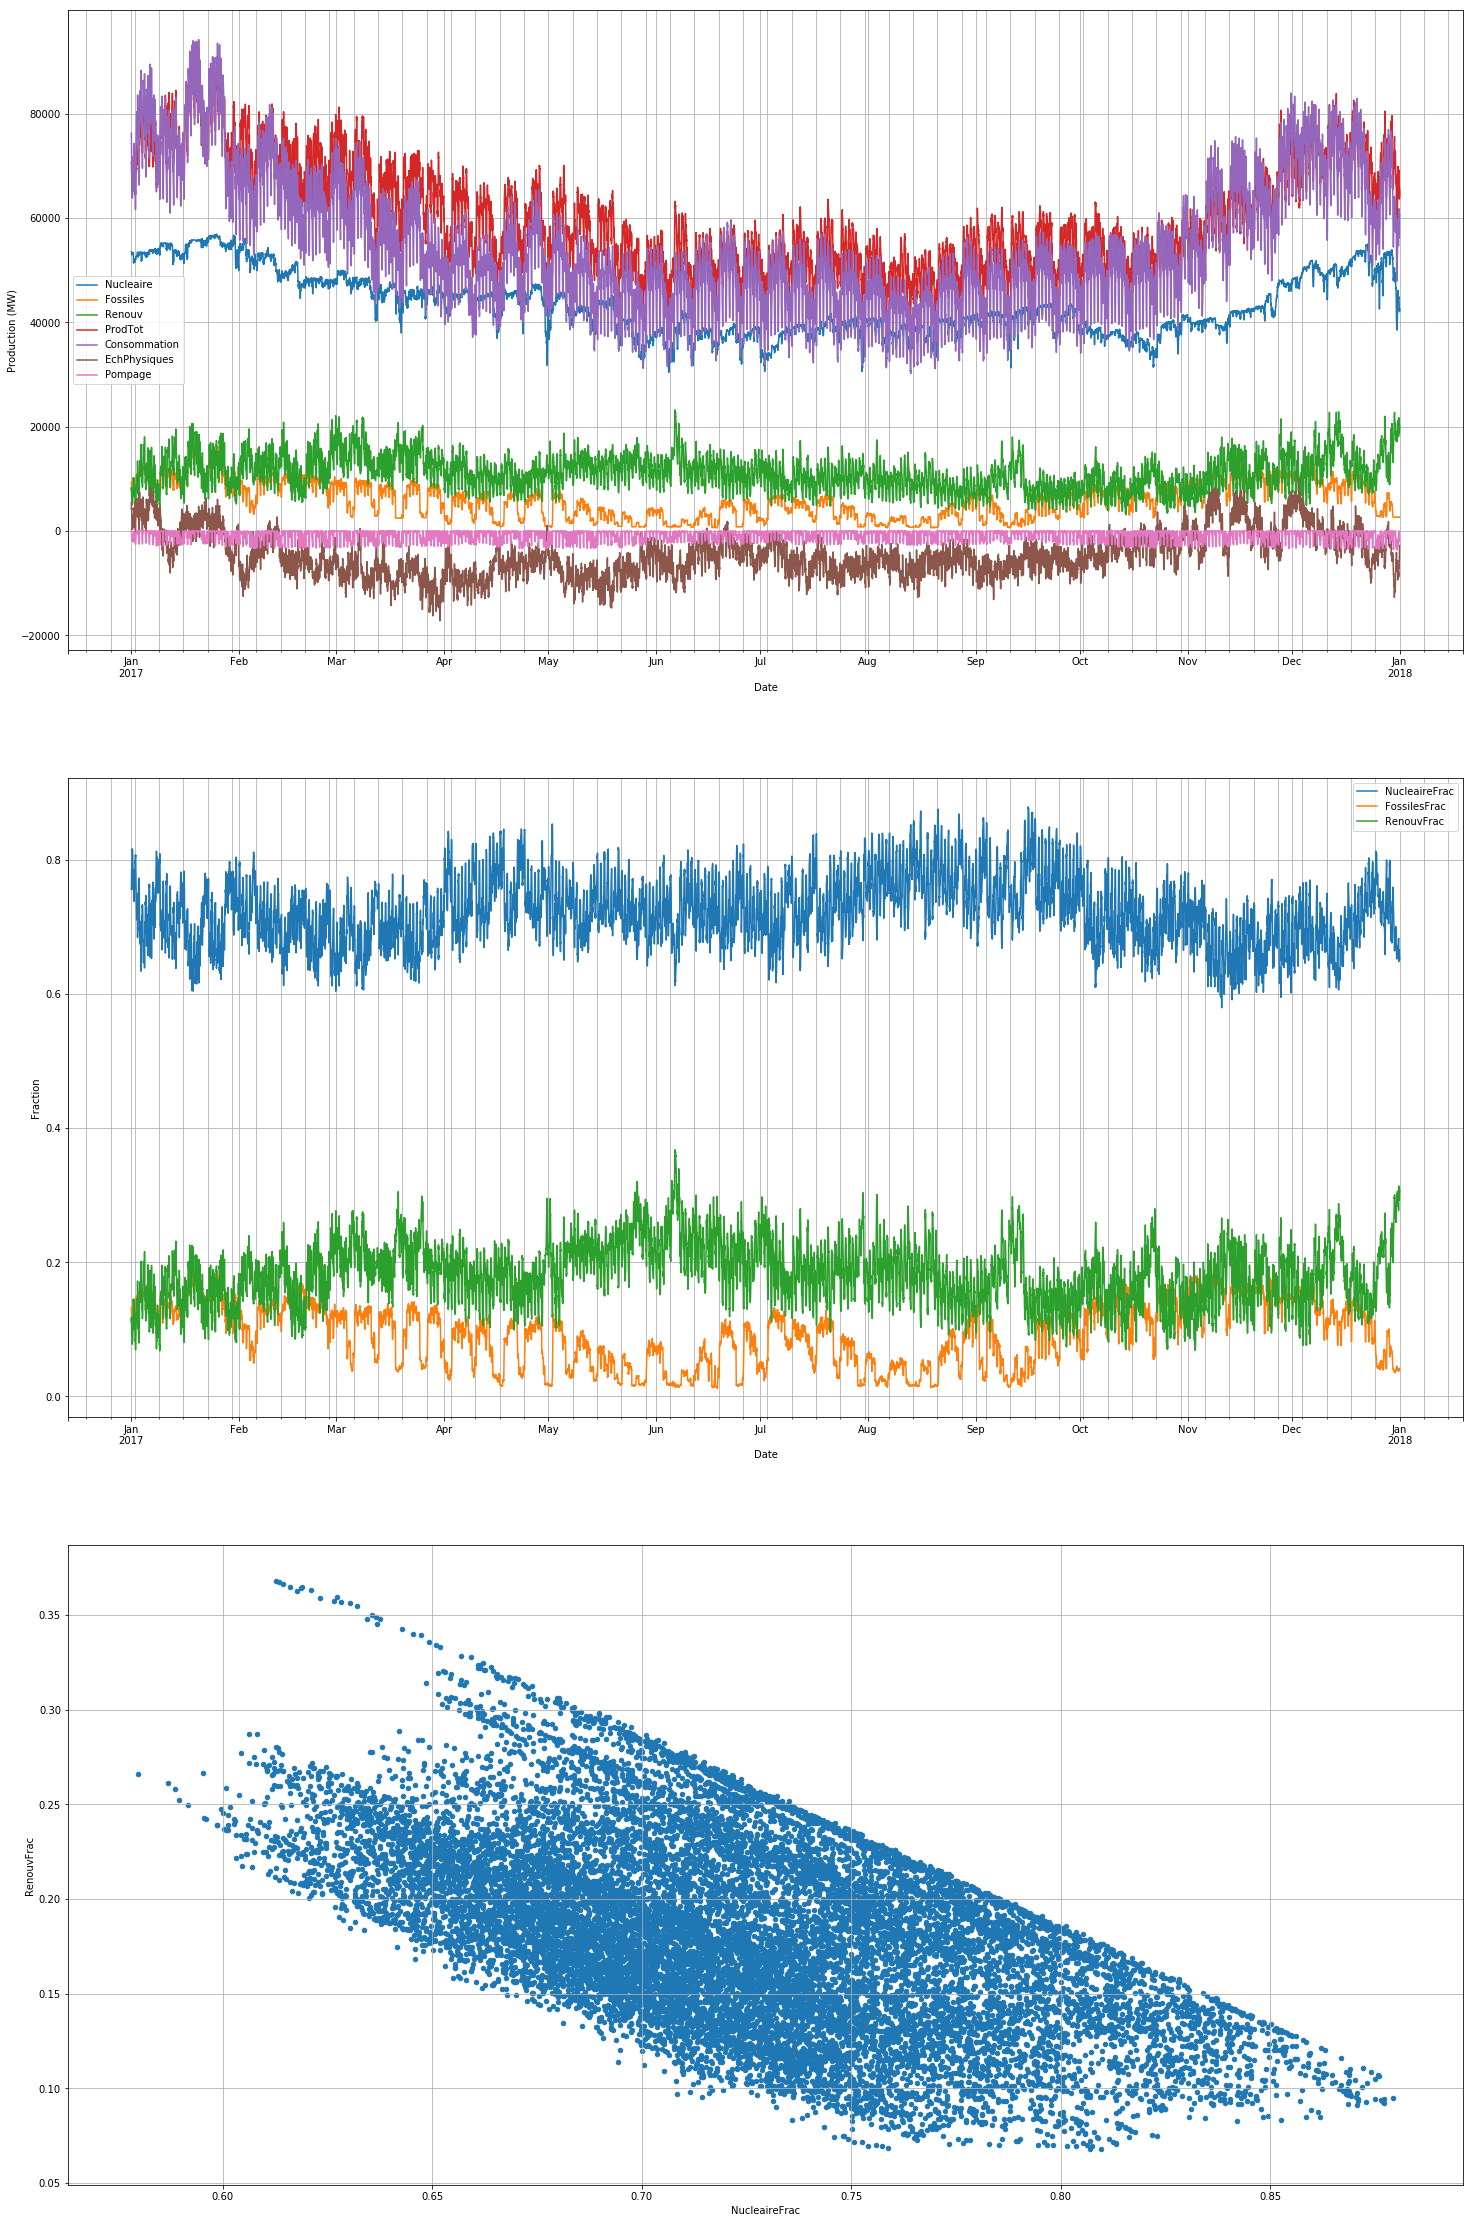

In [51]:
#df4 = df3.loc[:, 'Fioul' : 'Bioenergies']

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(25,40))

def makePlots(dateinf, datesup):
    df5 = df3[dateinf : datesup]
    df5.plot(y=['Nucleaire', 'Fossiles', 'Renouv', 'ProdTot', 'Consommation', 'EchPhysiques', 'Pompage'], grid=True, ax=axes[0])
    axes[0].set(xlabel='Date', ylabel='Production (MW)')
    axes[0].grid(True, which='minor', axis='x' )

    df5.plot(y=['NucleaireFrac', 'FossilesFrac', 'RenouvFrac'], grid=True, ax=axes[1])
    axes[1].set(xlabel='Date', ylabel='Fraction')
    axes[1].grid(True, which='minor', axis='x' )

    df5.plot.scatter(x='NucleaireFrac', y='RenouvFrac', grid=True, ax=axes[2])
    axes[2].set(xlabel='NucleaireFrac', ylabel='RenouvFrac')

makePlots('2017-01-01', '2017-12-31')

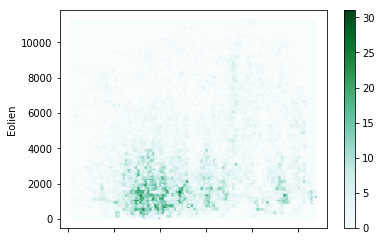

In [6]:
df.plot.hexbin(x='Nucleaire', y='Eolien', gridsize=100)